# 1. Import Libraries

In [97]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 2. Data Acquisition

In [98]:
train_df = pd.read_csv(r"C:\Users\alexa\OneDrive\Έγγραφα\Work_Python\Data_Analysis\London_House_Price_Prediction\1_Data_Acquisition\1_Raw\train.csv")
test_df = pd.read_csv(r"C:\Users\alexa\OneDrive\Έγγραφα\Work_Python\Data_Analysis\London_House_Price_Prediction\1_Data_Acquisition\1_Raw\test.csv")

# 3. Exploratory Data Analysis (EDA)

## 3.1. Dataset Structure and Quality Review

In [99]:
def data_info(df, name):
    """
    Function to display basic information about the DataFrame including:
    - Shape (rows and columns)
    - Column names
    - Detailed info (including dtypes and non-null counts)
    - First 5 rows
    - Descriptive statistics for all columns
    - Count of missing values per column
    - Count of duplicated rows
    """
    print(name)
    print(f"DataFrame shape:\n{df.shape}\n")  # e.g., (266325, 17)
    print(f"DataFrame columns:\n{df.columns.tolist()}\n")
    print(f"DataFrame info:\n{df.info()}\n")
    print(f"DataFrame head:\n{df.head()}\n")
    print(f"DataFrame description:\n{df.describe()}\n") # Summary for numeric columns
    print(f"DataFrame description:\n{df.describe(include=['object'])}\n") # Count of unique values in categorical variables
    print(f"DataFrame null values:\n{df.isnull().sum()}\n")  # Check for missing data
    print(f"DataFrame duplicates:\n{df.duplicated().sum()}\n")  # Check for duplicate rows

In [100]:
data_info(train_df, "Training Dataset")

'''
Training DataFrame shape:
(266325, 17)

Training DataFrame null values:
bathrooms              48479
bedrooms               24843
floorAreaSqM           13806
livingRooms            37040
tenure                  5721
propertyType             508
currentEnergyRating    56814

Missing Values in Rows:
96603
'''

print(f"\nRows with Missing Values: {train_df.isna().any(axis=1).sum()}")

Training Dataset
DataFrame shape:
(266325, 17)

DataFrame columns:
['ID', 'fullAddress', 'postcode', 'country', 'outcode', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'tenure', 'propertyType', 'currentEnergyRating', 'sale_month', 'sale_year', 'price']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266325 entries, 0 to 266324
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   266325 non-null  int64  
 1   fullAddress          266325 non-null  object 
 2   postcode             266325 non-null  object 
 3   country              266325 non-null  object 
 4   outcode              266325 non-null  object 
 5   latitude             266325 non-null  float64
 6   longitude            266325 non-null  float64
 7   bathrooms            217846 non-null  float64
 8   bedrooms             241482 non-null  float64
 9   floorAreaSqM         252519 non-n

In [101]:
data_info(test_df, "Testing Dataset")

'''
Testing DataFrame shape:
(16547, 16) -1 Price

Testing DataFrame null values:
bathrooms              2624
bedrooms               1375
floorAreaSqM           2006
livingRooms            2095
tenure                  590
propertyType            167
currentEnergyRating    1497

Missing Values in Rows:
5100
'''

print(f"\nRows with Missing Values: {test_df.isna().any(axis=1).sum()}")

Testing Dataset
DataFrame shape:
(16547, 16)

DataFrame columns:
['ID', 'fullAddress', 'postcode', 'country', 'outcode', 'latitude', 'longitude', 'bathrooms', 'bedrooms', 'floorAreaSqM', 'livingRooms', 'tenure', 'propertyType', 'currentEnergyRating', 'sale_month', 'sale_year']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16547 entries, 0 to 16546
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   16547 non-null  int64  
 1   fullAddress          16547 non-null  object 
 2   postcode             16547 non-null  object 
 3   country              16547 non-null  object 
 4   outcode              16547 non-null  object 
 5   latitude             16547 non-null  float64
 6   longitude            16547 non-null  float64
 7   bathrooms            13923 non-null  float64
 8   bedrooms             15172 non-null  float64
 9   floorAreaSqM         14541 non-null  float64
 10  livingR

## 3.2. Price Distribution Summaries by Key Features

In [102]:
summary_cols = [
    'bathrooms', 'bedrooms', 'livingRooms',
    'tenure', 'propertyType', 'currentEnergyRating',
    'sale_month', 'sale_year']

for col in summary_cols:
    summary_table = train_df.groupby(col)['price'].agg(
        mean='mean', median='median', max='max', min='min'
    ).round(2)
    print(f"\nPrice Summary by {col.capitalize()}:\n")
    print(summary_table.reset_index().to_string(index=False))
    print("-" * 50)


Price Summary by Bathrooms:

 bathrooms       mean    median       max    min
       1.0  374114.02  310000.0  88399999  10000
       2.0  727067.98  555000.0 100000000  10000
       3.0 1421139.44  985000.0  37500000  10000
       4.0 2260742.47 1596250.0  20200000  15000
       5.0 3470602.37 2000000.0  95900000  22700
       6.0 4310383.44 2250000.0  32500000  28000
       7.0 7085433.26 3900000.0  35000000  50000
       8.0 7218780.64 3890000.0  26000000  85000
       9.0 7866735.43 4839500.0  24000000 120000
--------------------------------------------------

Price Summary by Bedrooms:

 bedrooms       mean    median       max   min
      1.0  334370.53  270000.0  99238058 10000
      2.0  435280.29  348000.0  42225000 10000
      3.0  597305.36  445000.0 100000000 10000
      4.0  882866.99  655000.0  95900000 10000
      5.0 1292394.92  920000.0  30000000 12000
      6.0 2057308.96 1300000.0  36200000 15000
      7.0 3235523.15 1850000.0  31500000 30000
      8.0 4772324.50 225

## 3.3. Categorical Variable Distributions

In [103]:
categorical_cols = [
    'bathrooms', 'bedrooms', 'livingRooms',
    'tenure', 'propertyType', 'currentEnergyRating']

for col in categorical_cols:
    print(f"\nCategory Proportion for {col.capitalize()}:")
    print(train_df[col].value_counts(normalize=True).round(4))
    print("-" * 50)


Category Proportion for Bathrooms:
bathrooms
1.0    0.6584
2.0    0.2699
3.0    0.0541
4.0    0.0122
5.0    0.0032
6.0    0.0015
7.0    0.0005
8.0    0.0002
9.0    0.0001
Name: proportion, dtype: float64
--------------------------------------------------

Category Proportion for Bedrooms:
bedrooms
2.0    0.3754
3.0    0.2542
1.0    0.1938
4.0    0.1145
5.0    0.0465
6.0    0.0122
7.0    0.0025
8.0    0.0008
9.0    0.0002
Name: proportion, dtype: float64
--------------------------------------------------

Category Proportion for Livingrooms:
livingRooms
1.0    0.7606
2.0    0.1971
3.0    0.0344
4.0    0.0060
5.0    0.0014
6.0    0.0003
7.0    0.0001
8.0    0.0000
9.0    0.0000
Name: proportion, dtype: float64
--------------------------------------------------

Category Proportion for Tenure:
tenure
Leasehold    0.5983
Freehold     0.3918
Feudal       0.0073
Shared       0.0027
Name: proportion, dtype: float64
--------------------------------------------------

Category Proportion for P

## 3.4. Visualizing Distributions of Numerical Columns

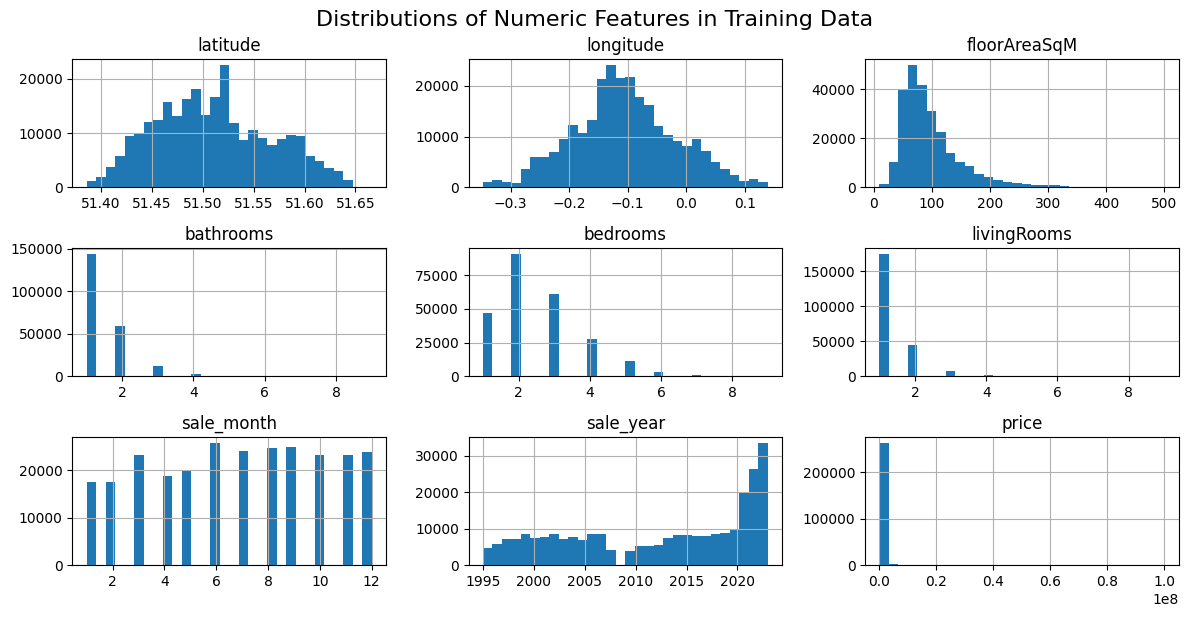

In [104]:
numeric_cols = [
    'latitude', 'longitude',
    'floorAreaSqM', 'bathrooms', 'bedrooms', 'livingRooms',
    'sale_month', 'sale_year',
    'price']

train_df[numeric_cols].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.suptitle('Distributions of Numeric Features in Training Data', fontsize=16, y=1.02)
plt.show()

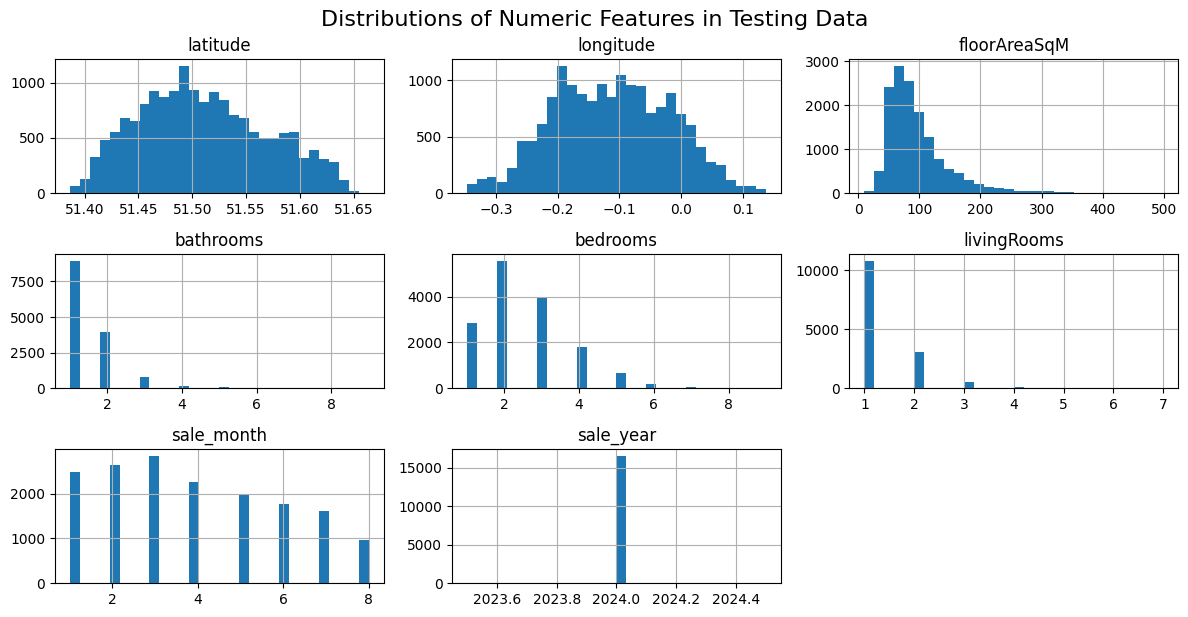

In [105]:
test_df[[
    'latitude', 'longitude',
    'floorAreaSqM', 'bathrooms', 'bedrooms', 'livingRooms',
    'sale_month', 'sale_year']].hist(bins=30, figsize=(12, 6))
plt.tight_layout()
plt.suptitle('Distributions of Numeric Features in Testing Data', fontsize=16, y=1.02)
plt.show()

## 3.5. Visualizing Categorical Feature Frequencies

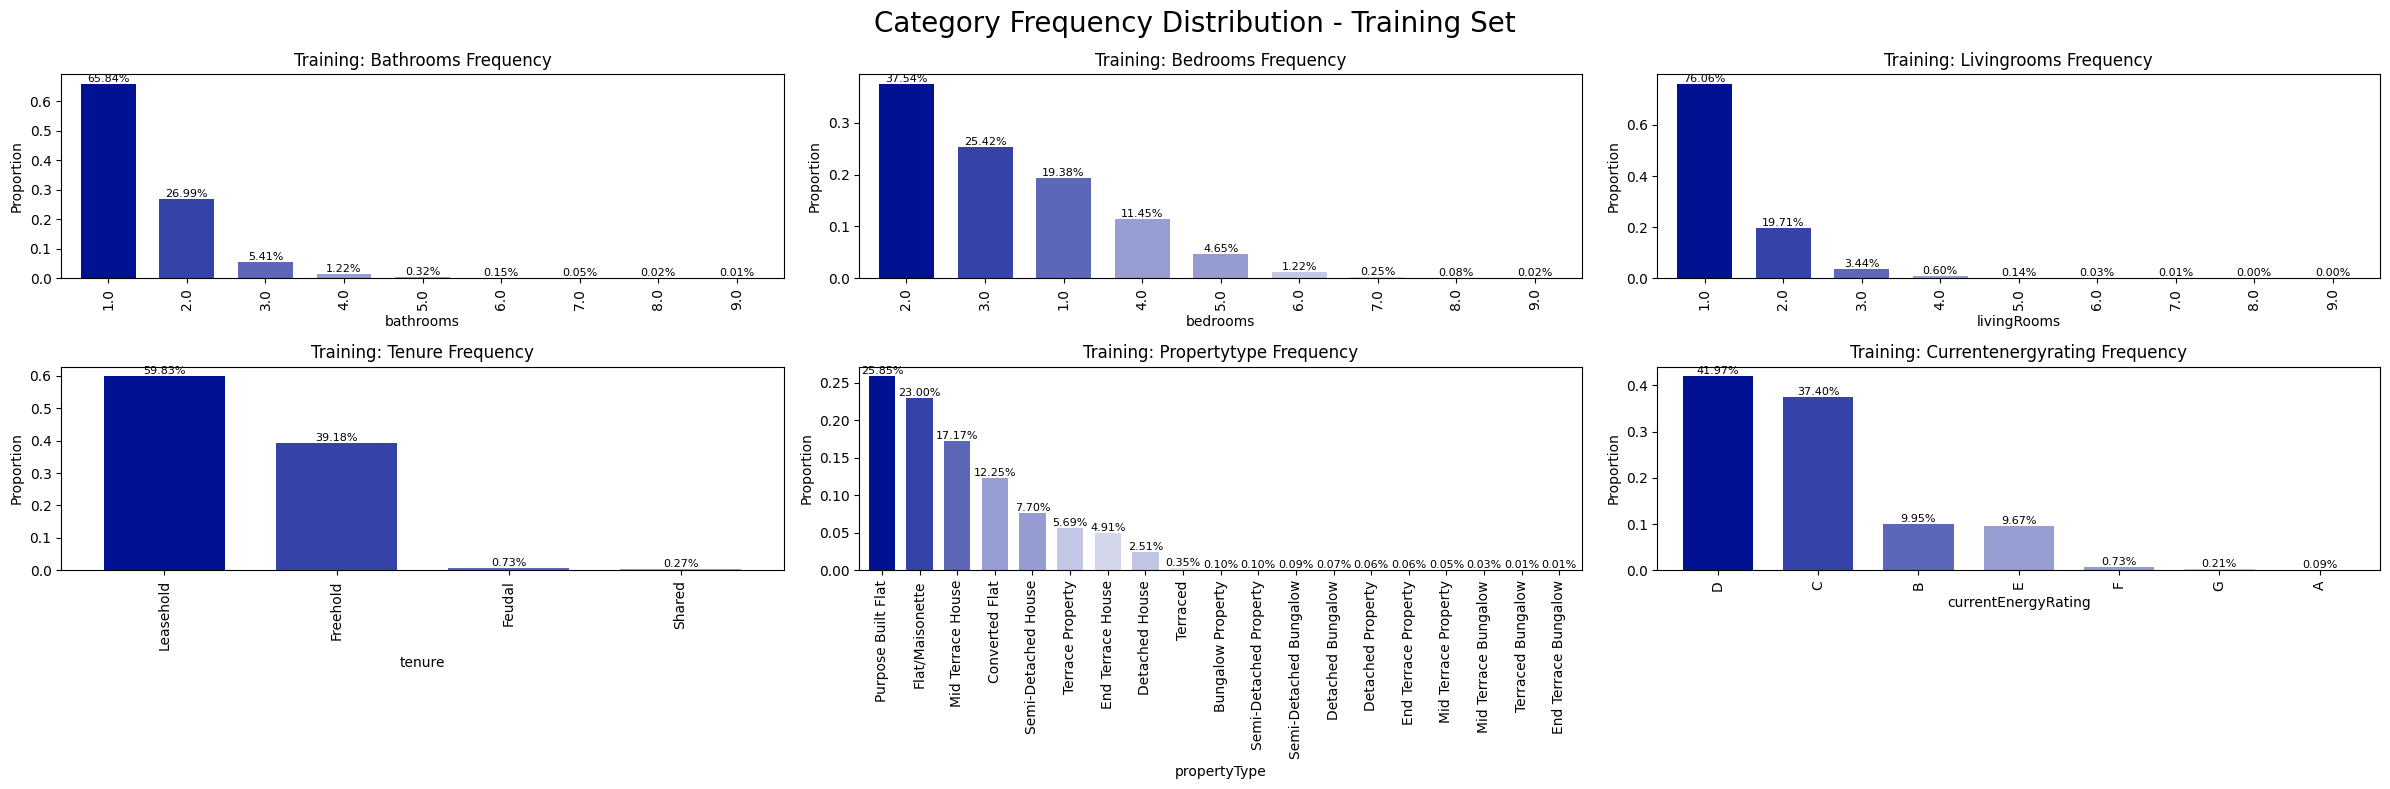

In [106]:
cols = 3
n = len(categorical_cols)
rows = n // cols + int(n % cols != 0)

fig, axes = plt.subplots(rows, cols, figsize=(24, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = train_df[col].value_counts(normalize=True)
    ax = axes[i]
    bars = counts.plot(kind='bar', ax=ax, color=["#001191FF", "#001191CA", "#001191A3", "#00119168",
                                                 "#0011916A", "#0011913C", "#0011912B", "#0011913E",
                                                 "#0011911D", "#00119100"], width=0.7)
    ax.set_title(f"Training: {col.capitalize()} Frequency")
    ax.set_ylabel('Proportion')
    ax.set_xlabel(col)
    plt.setp(ax.get_xticklabels(), rotation=90)
    for p in bars.patches:
        percent = f'{100 * p.get_height():.2f}%'
        ax.annotate(percent, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=8)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Category Frequency Distribution - Training Set', size=20)
plt.tight_layout()
plt.show()

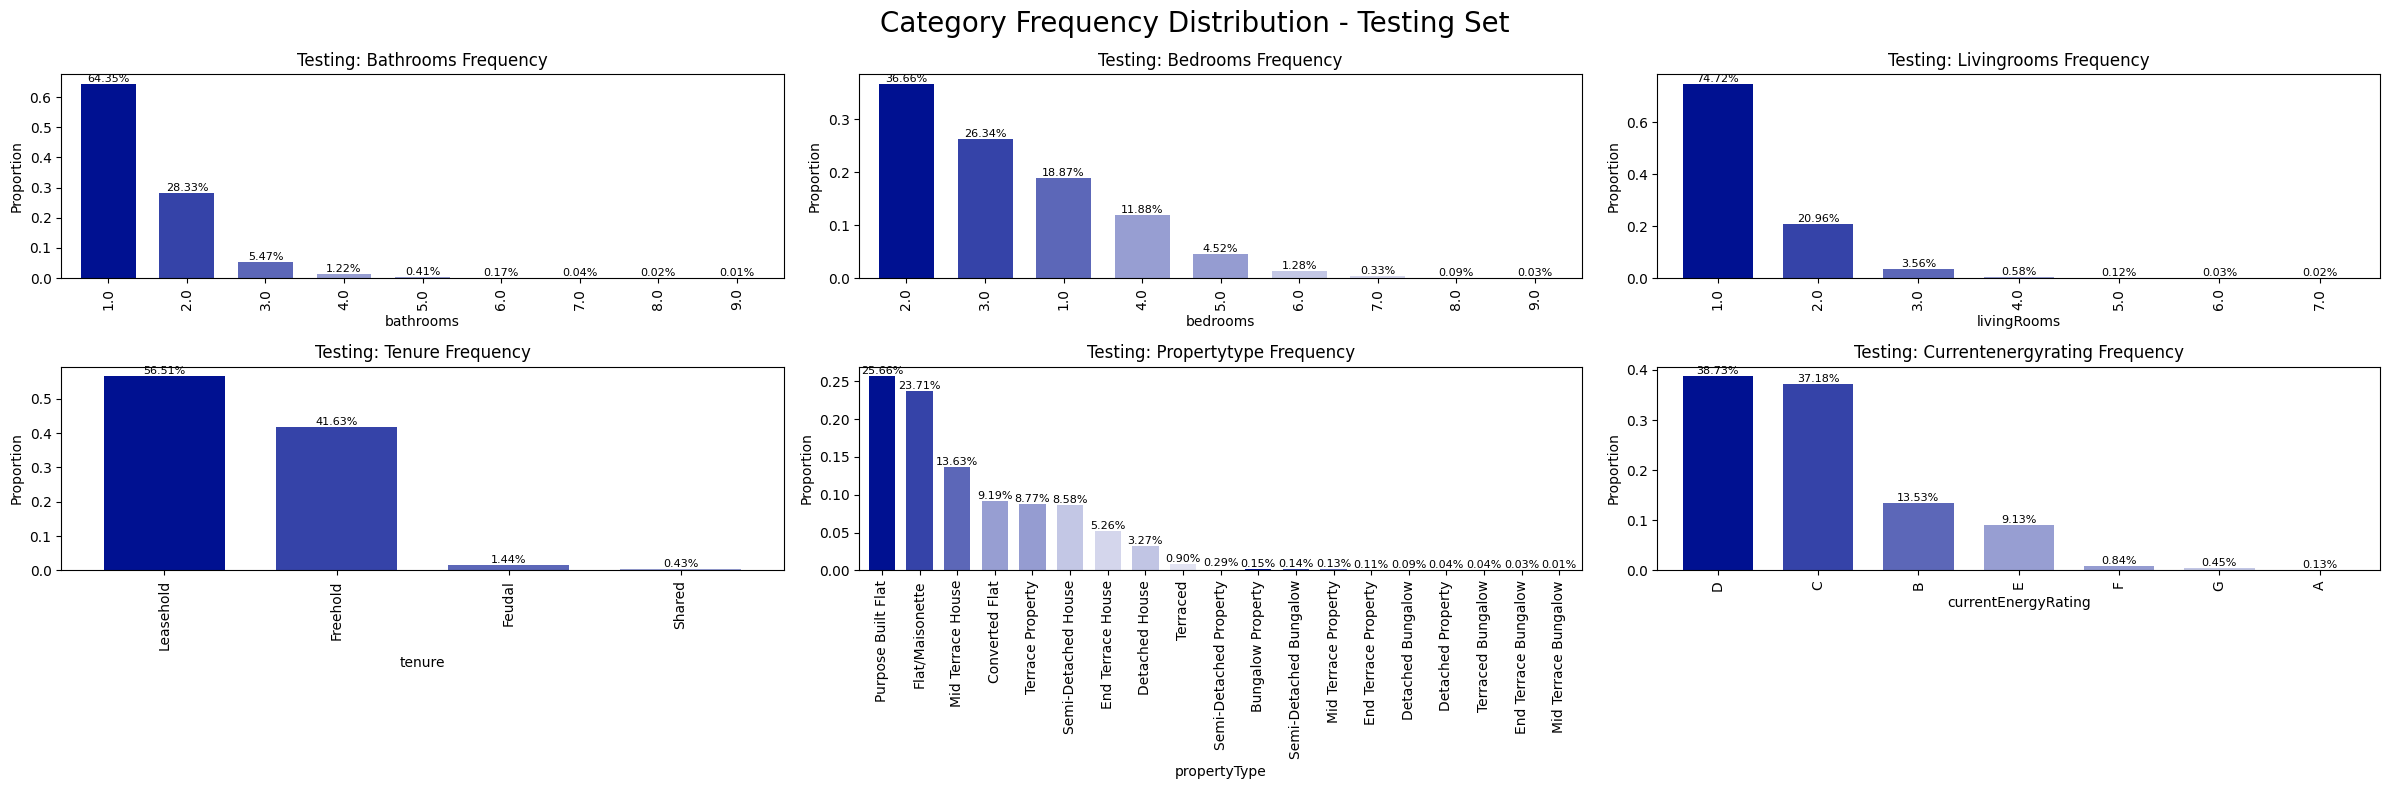

In [107]:
fig, axes = plt.subplots(rows, cols, figsize=(24, 8))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = test_df[col].value_counts(normalize=True)
    ax = axes[i]
    bars = counts.plot(kind='bar', ax=ax, color=["#001191FF", "#001191CA", "#001191A3", "#00119168",
                                                 "#0011916A", "#0011913C", "#0011912B", "#0011913E",
                                                 "#0011911D", "#00119100"], width=0.7)
    ax.set_title(f"Testing: {col.capitalize()} Frequency")
    ax.set_ylabel('Proportion')
    ax.set_xlabel(col)
    plt.setp(ax.get_xticklabels(), rotation=90)
    for p in bars.patches:
        percent = f'{100 * p.get_height():.2f}%'
        ax.annotate(percent, (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom', fontsize=8)

for j in range(len(categorical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Category Frequency Distribution - Testing Set', size=20)
plt.tight_layout()
plt.show()


## 3.6. Feature Relationships via Pair Plots

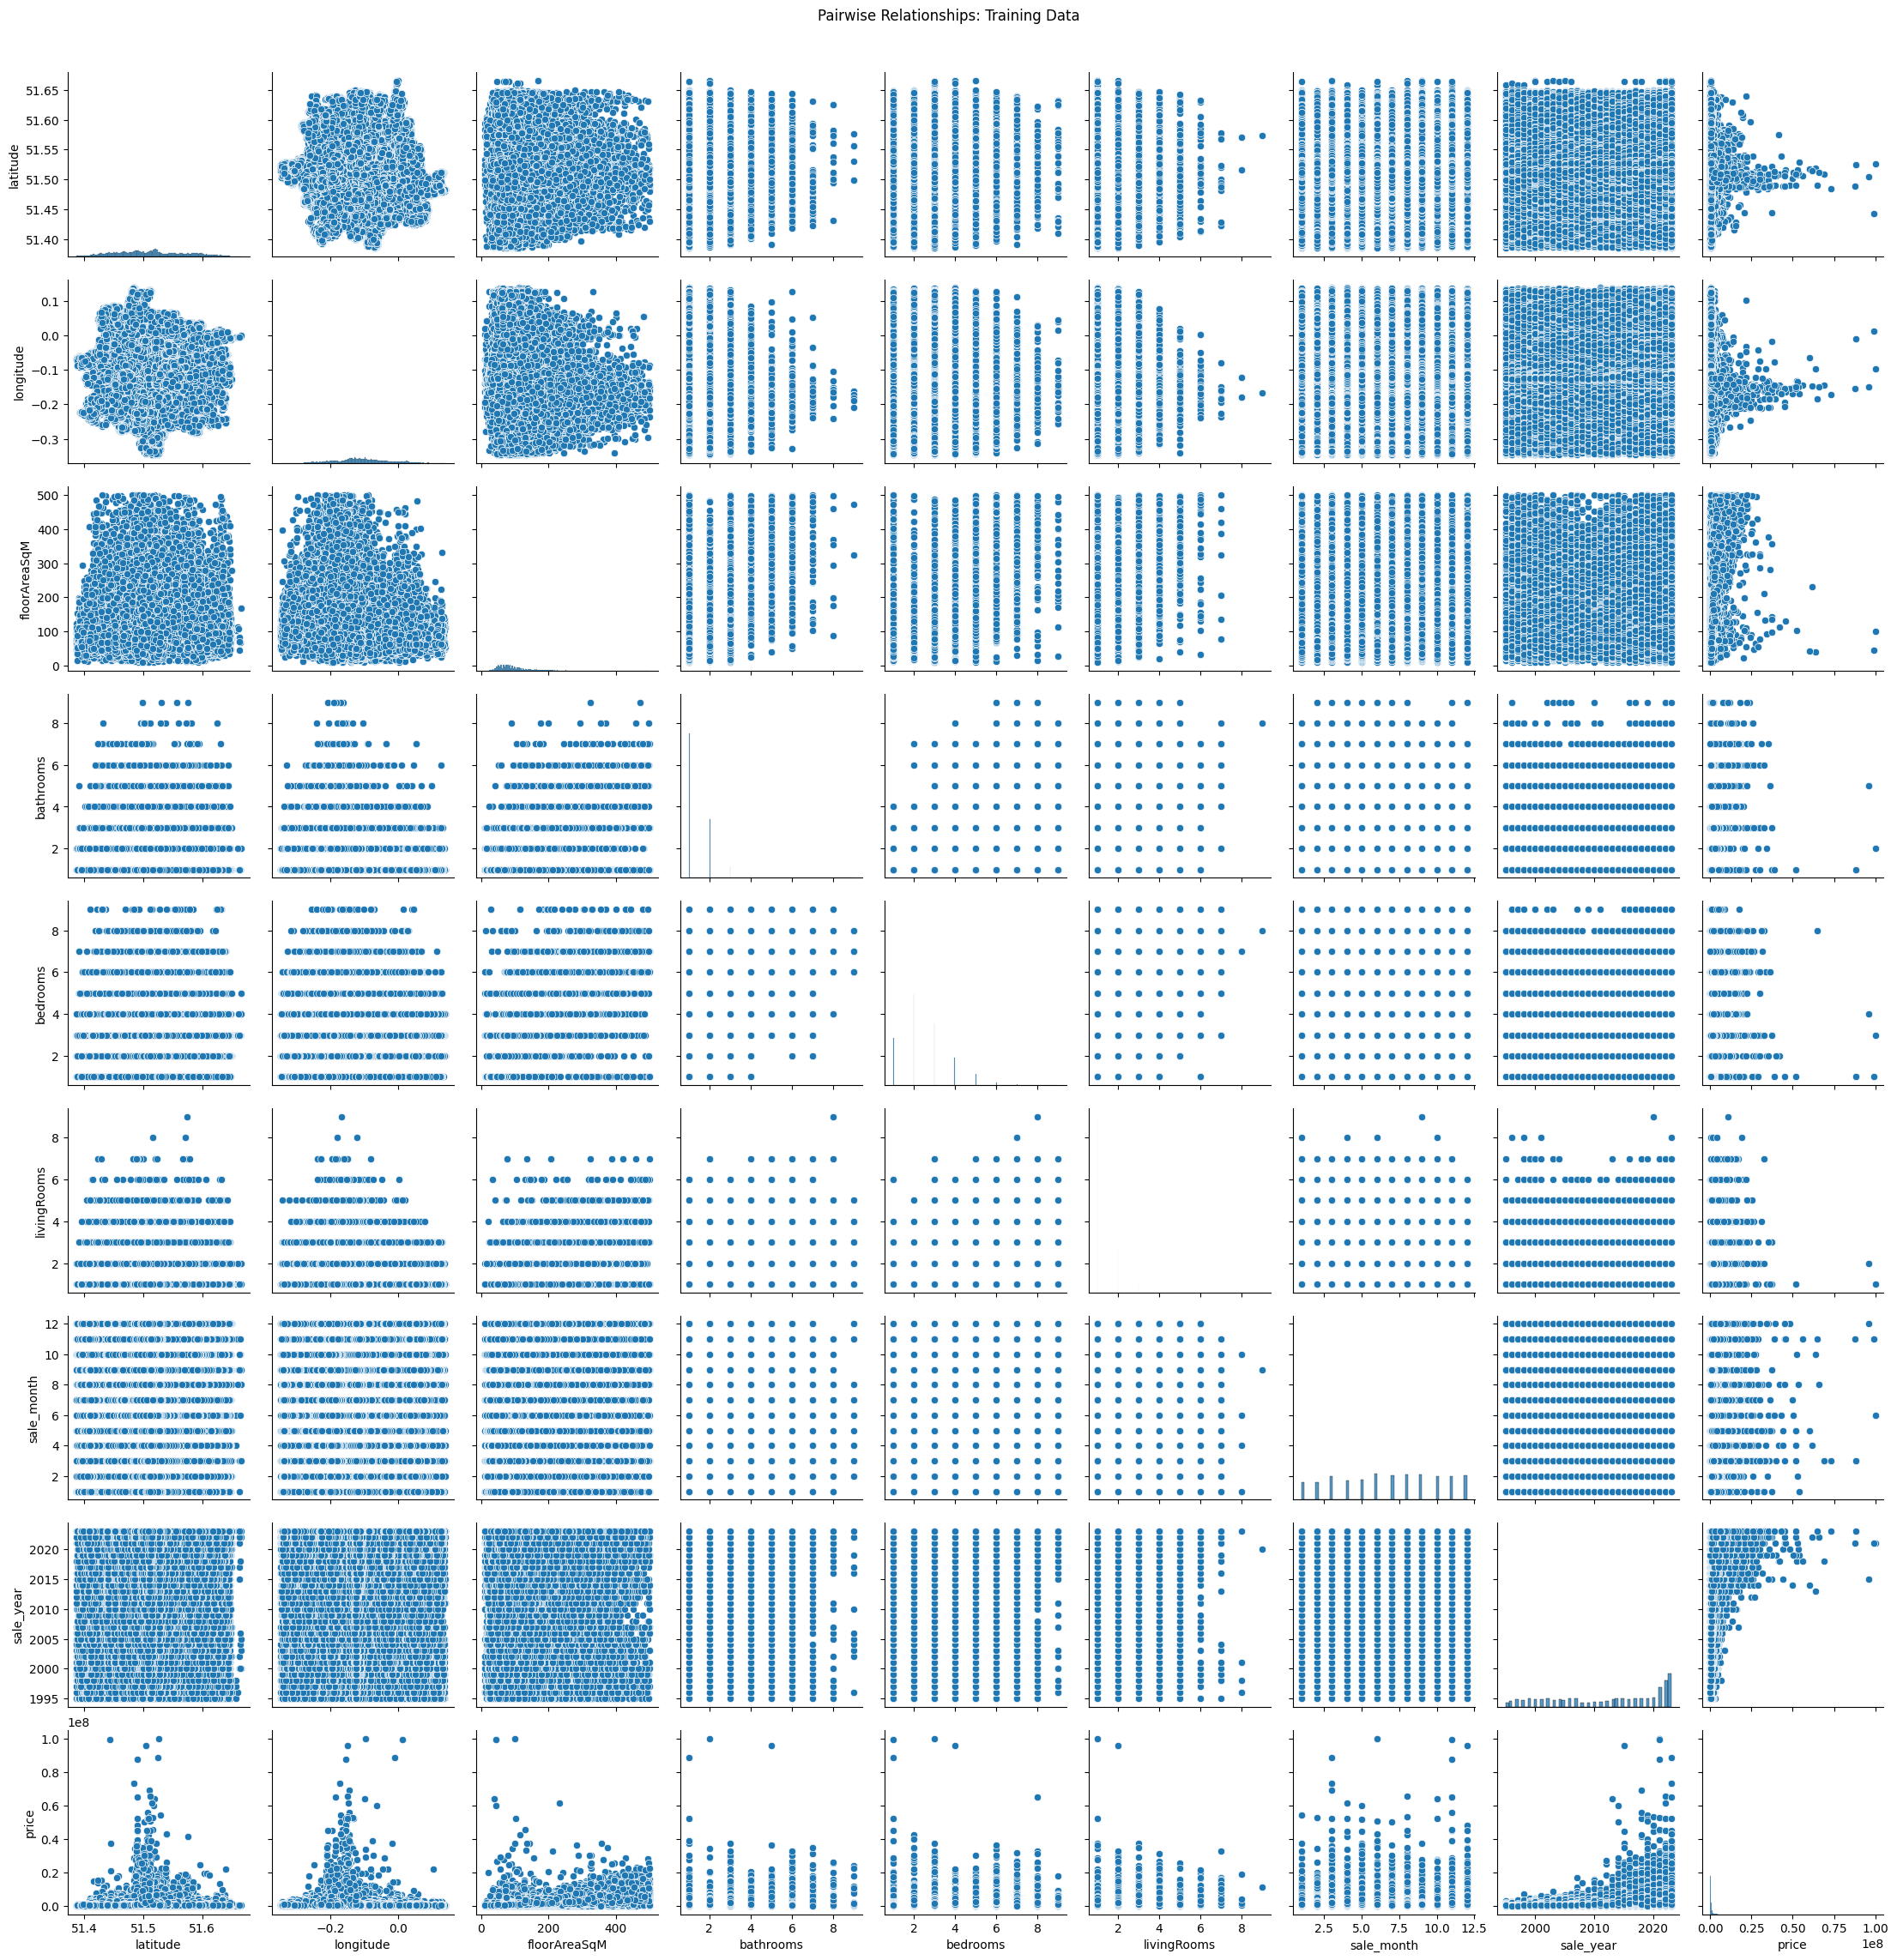

In [108]:
sns.pairplot(train_df[numeric_cols])
plt.suptitle('Pairwise Relationships: Training Data', y=1.02)
plt.show()


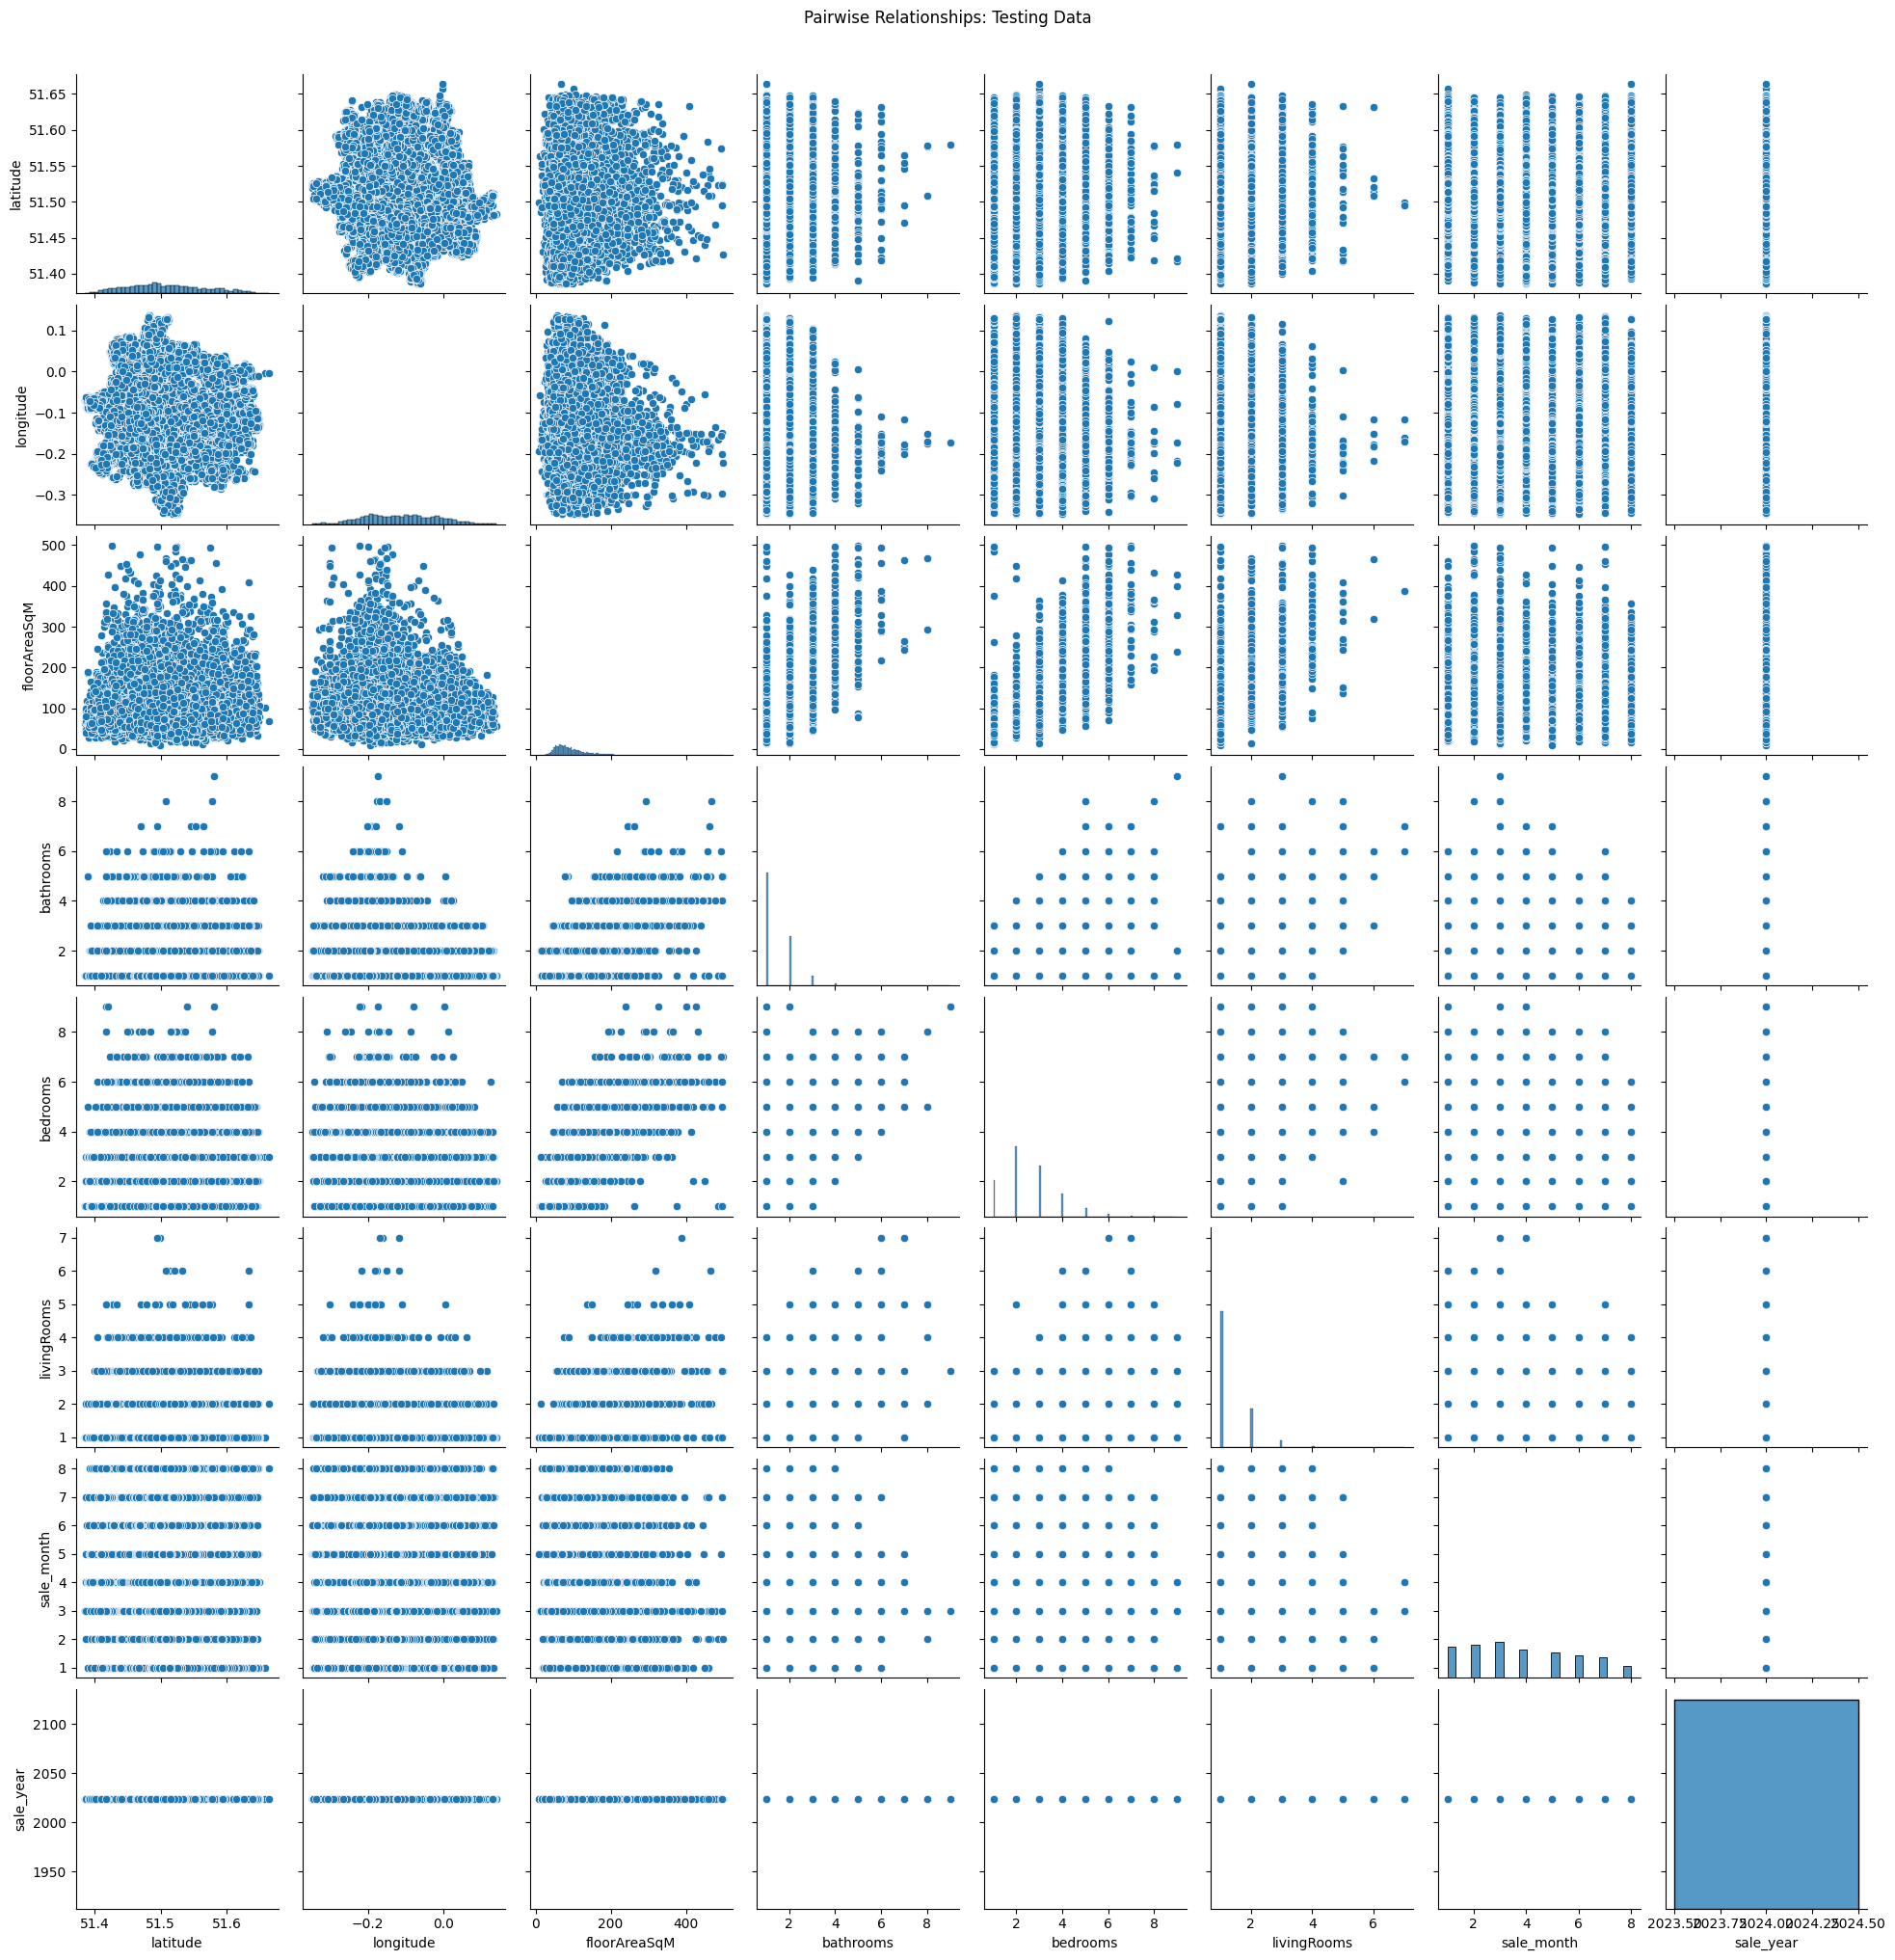

In [109]:
sns.pairplot(test_df[
    ['latitude', 'longitude',
    'floorAreaSqM', 'bathrooms', 'bedrooms', 'livingRooms',
    'sale_month', 'sale_year']])
plt.suptitle('Pairwise Relationships: Testing Data', y=1.02)
plt.show()


## 3.7. Correlation Analysis

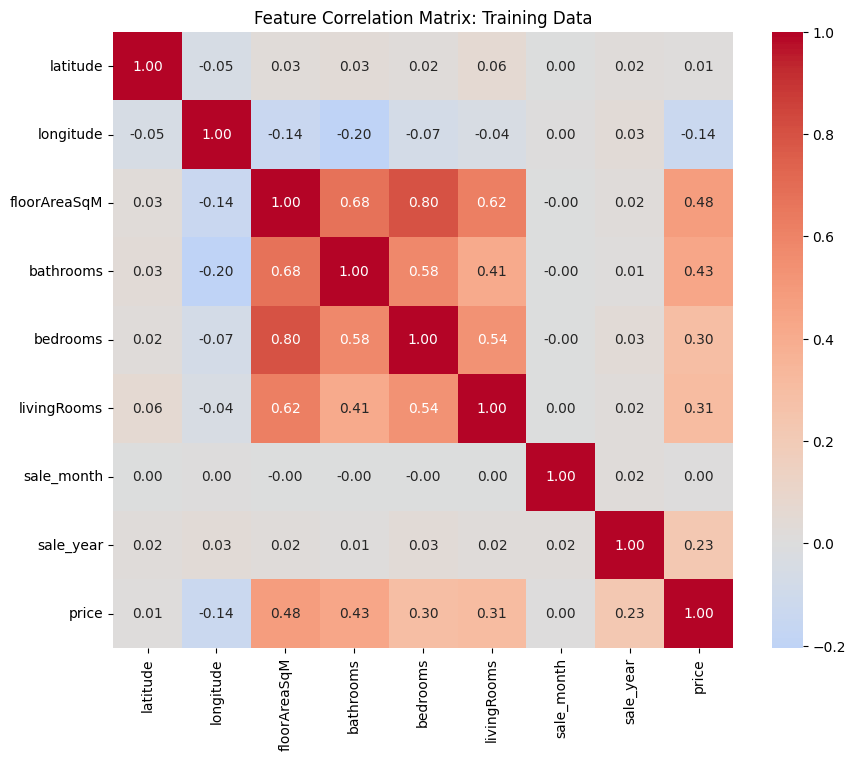

Top 10 features most correlated with price:
 floorAreaSqM    0.481342
bathrooms       0.431295
livingRooms     0.312593
bedrooms        0.295716
sale_year       0.225839
longitude      -0.137680
latitude        0.009192
sale_month      0.004694
Name: price, dtype: float64


In [110]:
corr = train_df[numeric_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix: Training Data')
plt.show()

target_corr = corr['price'].drop('price').sort_values(key=np.abs, ascending=False)
print("Top 10 features most correlated with price:\n", target_corr.head(10))


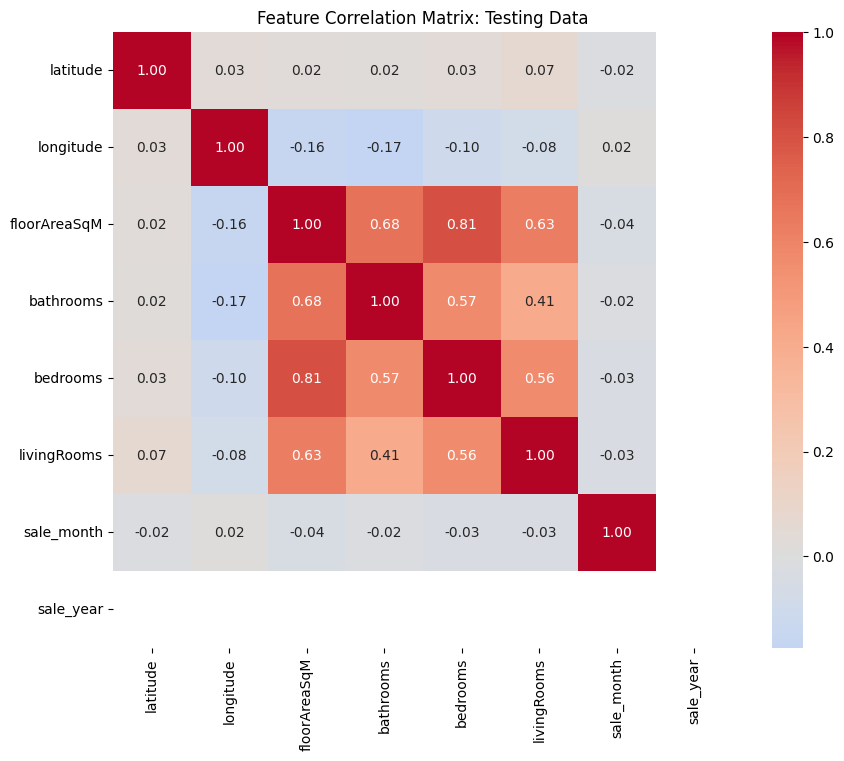

In [111]:
corr = test_df[
    ['latitude', 'longitude',
     'floorAreaSqM', 'bathrooms', 'bedrooms', 'livingRooms',
     'sale_month', 'sale_year']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix: Testing Data')
plt.show()
